In [1]:
import mne
import os
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

In [2]:
import warnings
import logging
import pandas as pd
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("mne").setLevel(logging.WARNING)

In [3]:
ratings = pd.read_excel('ratings/Result movies.xlsx')
ratings = ratings[0 : 21][['a.mp4', 'b.mp4', 'c.mp4', 'd.mp4', 'e.mp4', 'f.mp4','g.mp4', 'h.mp4']]
ratings

,a.mp4,b.mp4,c.mp4,d.mp4,e.mp4,f.mp4,g.mp4,h.mp4
0,10,10.0,2.0,5.0,9.0,9.0,5.0,9.0
1,10,8.0,7.0,9.0,7.0,6.0,6.0,9.0
2,6,3.0,5.0,6.0,5.0,5.0,5.0,2.0
3,8,6.0,5.0,9.0,5.0,7.0,4.0,6.0
4,3,2.0,4.0,1.0,7.0,3.0,7.0,2.0
5,7,7.0,2.0,8.0,5.0,3.0,2.0,5.0
6,9,4.0,4.0,3.0,9.0,8.0,8.0,5.0
7,5,7.0,5.0,9.0,3.0,2.0,8.0,7.0
8,8,8.0,2.0,3.0,7.0,5.0,5.0,9.0
9,3,8.0,7.0,3.0,1.0,3.0,6.0,2.0


In [28]:
dct = {'a': 308, 'b' : 384, 'c' : 356, 'd' : 435, 'e': 249, 'f' : 381, 'g' : 337, 'h' : 383}
for Subject in tqdm_notebook(range(1, 21)):
    if Subject == 5:
        continue
    if not os.path.isfile('filtered_fif_ISC/' + ('S0' + str(Subject) if Subject < 10 else 'S' + str(Subject)) + '_final_ICA.fif'):
        continue
    raw = mne.io.read_raw('filtered_fif_ISC/' + ('S0' + str(Subject) if Subject < 10 else 'S' + str(Subject)) + '_final_ICA.fif')
    for annot in raw.annotations:
        if Subject == 6 and annot['description'].split('_')[-1] == 'b':
            continue
        time = dct[annot['description'].split('_')[-1]]
        cpy = raw.copy()
        try:
            cpy.crop(tmin=annot['onset'] + 5, tmax=(annot['onset'] + time + 5))
        except Exception as e:
            cpy.crop(tmin=annot['onset'] + 5, tmax=(annot['onset'] + time + 5 - 0.01))
        if not os.path.exists('cropped_ISC/' + str(int(Subject))):
            os.makedirs('cropped_ISC/' + str(int(Subject)))
        if 'relax' in annot['description'].split('_'):
            continue
            #cpy.save('cropped_ISC/' + str(int(Subject)) +'/' + 'relax_' + annot['description'].split('_')[-1]  + '.fif', overwrite=True)
        cpy.save('cropped_ISC/' + str(int(Subject)) +'/' + annot['description'] + '.fif', overwrite=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
dct = {'a': 308, 'b' : 384, 'c' : 356, 'd' : 435, 'e': 249, 'f' : 381, 'g' : 337, 'h' : 383}
for Subject in tqdm_notebook(range(1, 21)):
    if Subject == 5:
        continue
    if not os.path.isfile('filtered_fif_ISC/' + ('S0' + str(Subject) if Subject < 10 else 'S' + str(Subject)) + '_final_ICA.fif'):
        continue
    raw = mne.io.read_raw('filtered_fif_ISC/' + ('S0' + str(Subject) if Subject < 10 else 'S' + str(Subject)) + '_final_ICA.fif')
    for annot in raw.annotations:
        if Subject == 6 and annot['description'].split('_')[-1] == 'b':
            continue
        time = dct[annot['description'].split('_')[-1]]
        cpy = raw.copy()
        try:
            cpy.crop(tmin=annot['onset'] + 5, tmax=(annot['onset'] + time + 5))
        except Exception as e:
            cpy.crop(tmin=annot['onset'] + 5, tmax=(annot['onset'] + time + 5 - 0.01))
        if not os.path.exists('cropped_ISC/' + str(int(Subject))):
            os.makedirs('cropped_ISC/' + str(int(Subject)))
        if 'relax' in annot['description'].split('_'):
            continue
            #cpy.save('cropped_ISC/' + str(int(Subject)) +'/' + 'relax_' + annot['description'].split('_')[-1]  + '.fif', overwrite=True)
        cpy.save('cropped_ISC/' + str(int(Subject)) +'/' + annot['description'] + '.fif', overwrite=True)

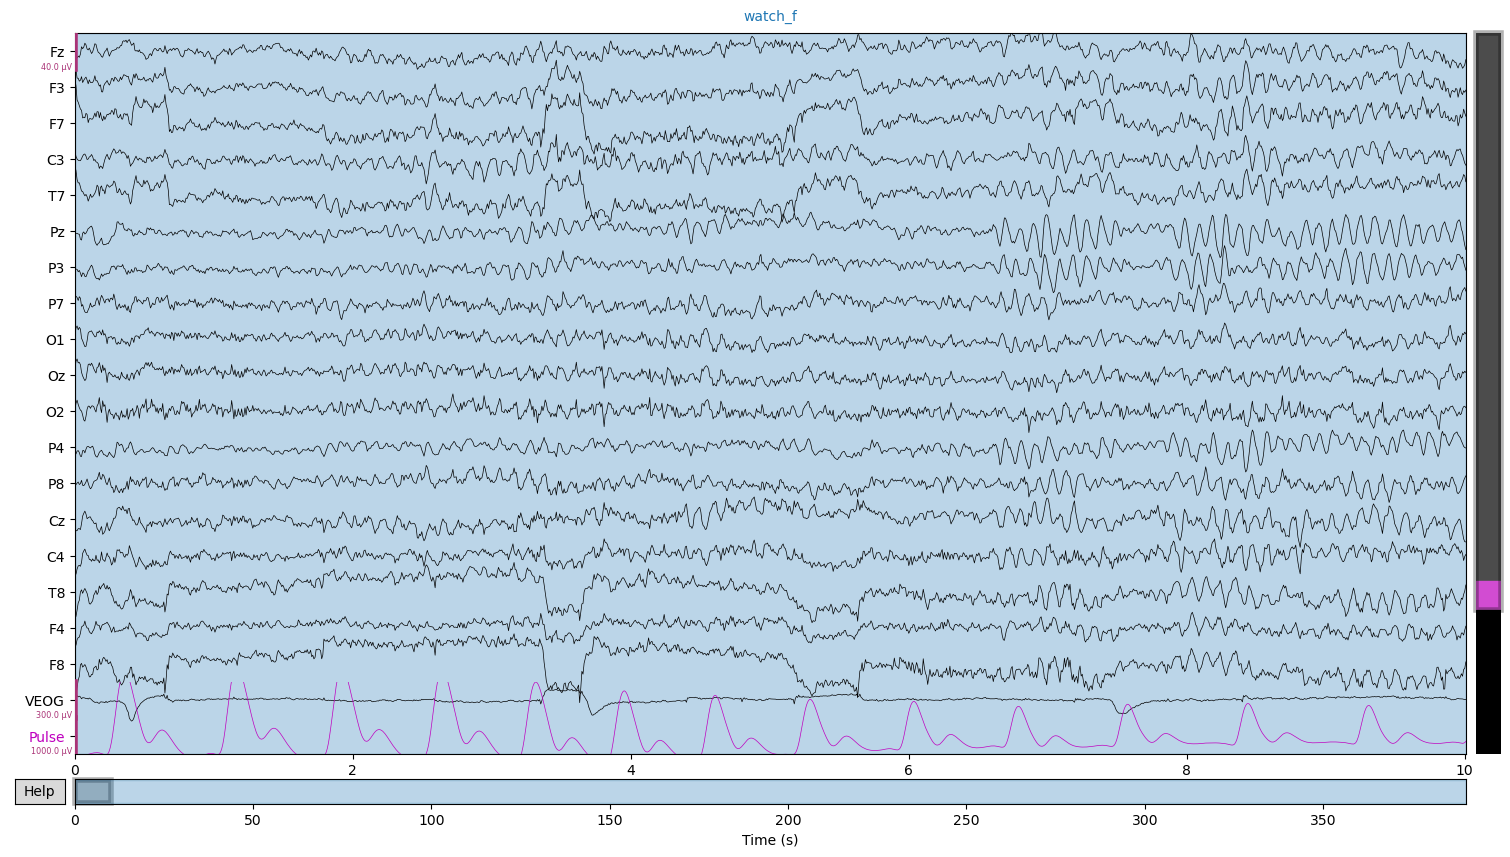

In [25]:
%matplotlib tk
mne.io.read_raw("cropped_ISC/7/watch_f.fif").plot()
#mne.io.read_raw("cropped_ISC/7/watch_a.fif").plot()

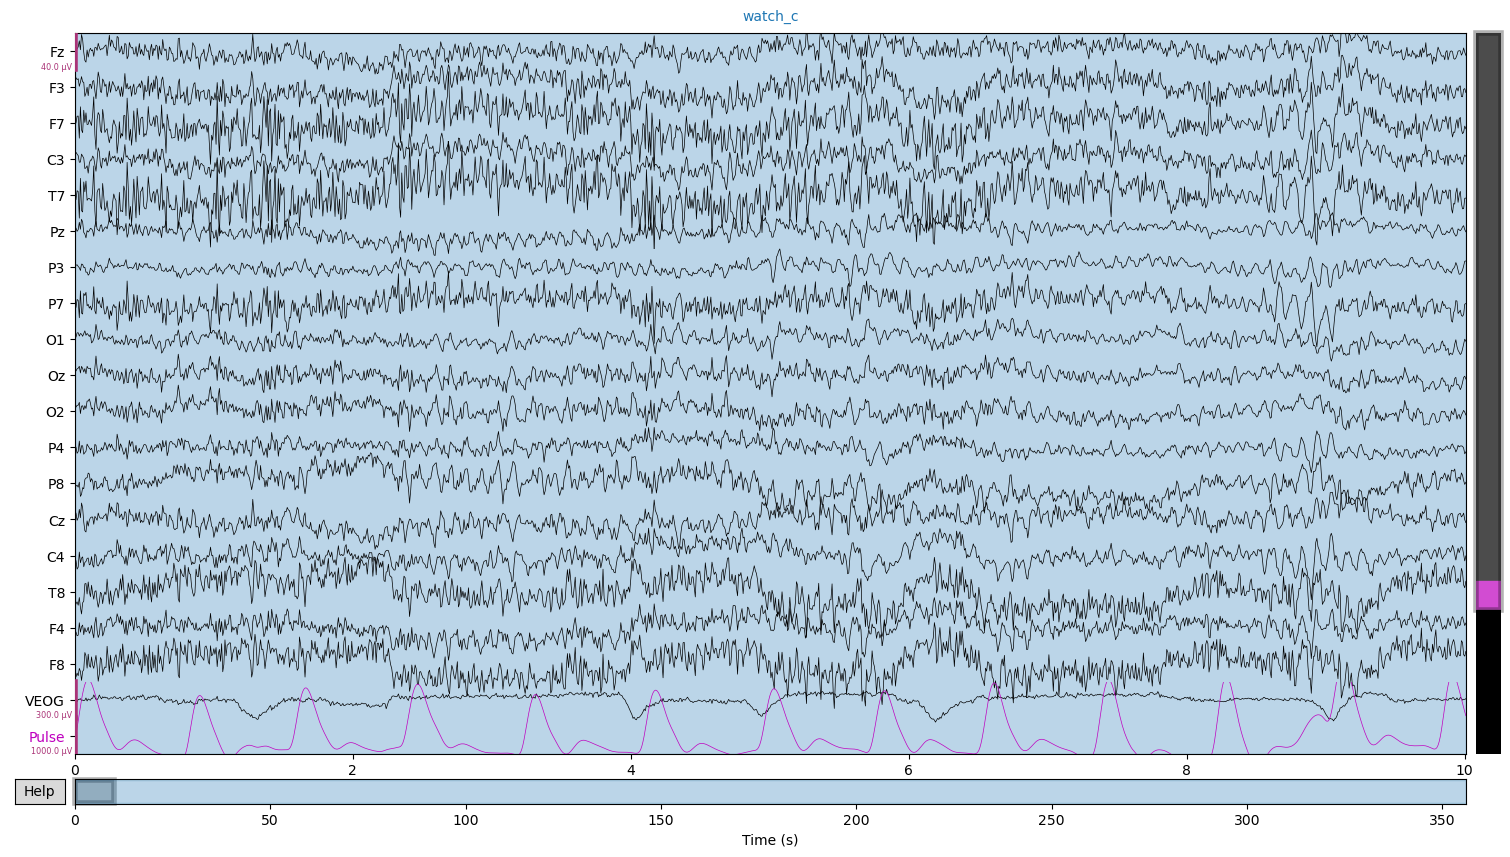

In [32]:
mne.io.read_raw("cropped_ISC/6/watch_c.fif").plot()

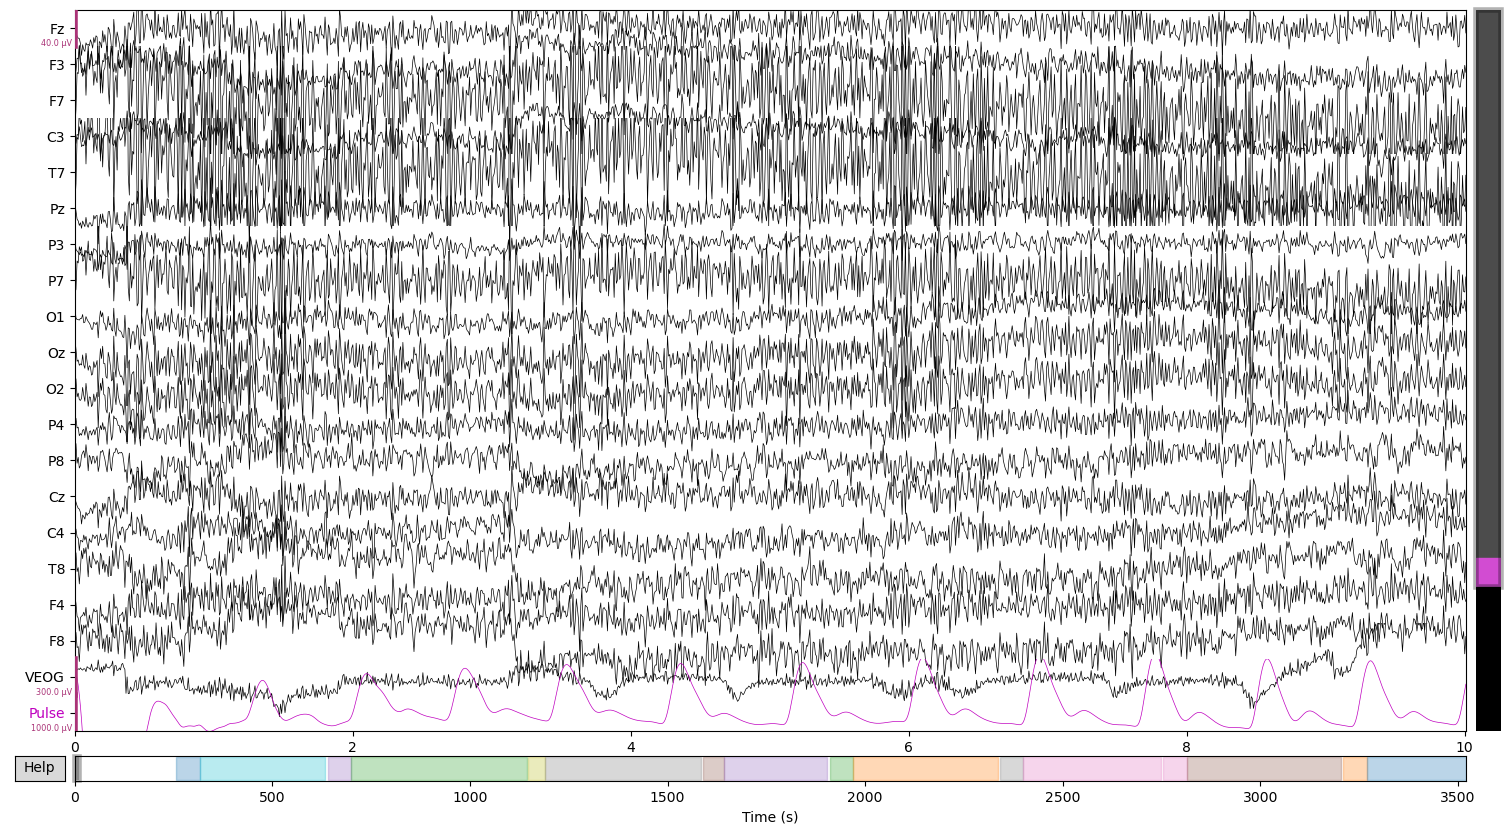

In [35]:
mne.io.read_raw("cropped_ISC/6/watch_c.fif").plot()
mne.io.read_raw("filtered_fif_ISC/S06_final_ICA.fif").plot()